<a href="https://colab.research.google.com/github/Rahul6158/CODSOFT/blob/main/Task_1_Movie_Genre_Classification(LR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie_Genre_Classification Using Logistic Regression

[Dataset](https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb)

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re  # for pattern matching and text manipulation.
import string
import nltk
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer as CV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
train_data = pd.read_csv("train_data.txt", sep=':::', names=["title", "genre", "description"], engine='python')
test_data = pd.read_csv("test_data.txt", sep=':::', names=["title", "description"], engine='python')

In [ ]:
train_data.head()

,title,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
test_data.head()

,title,description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


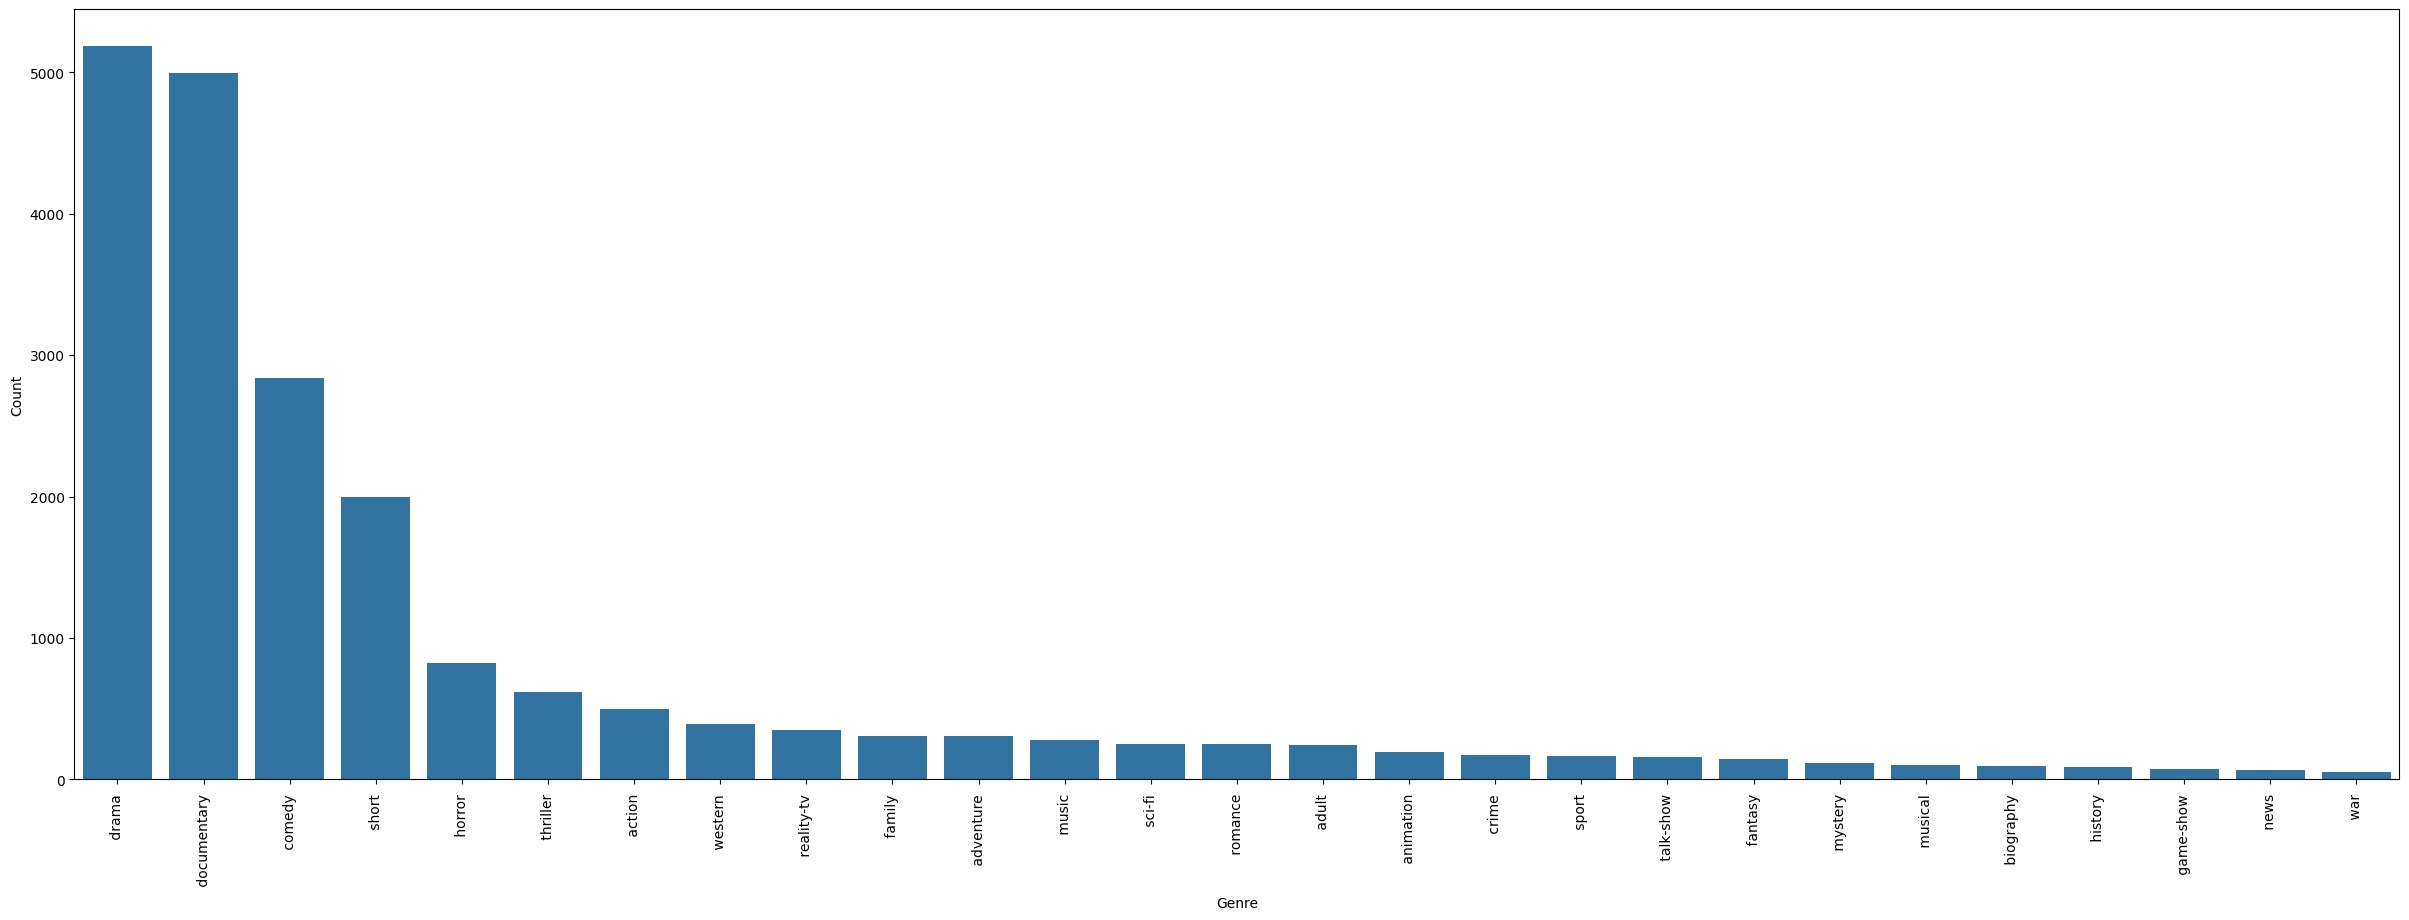

In [ ]:
plt.figure(figsize=(30,10))
counts = train_data.genre.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90);

In [ ]:
train_data.describe()

,title,genre,description
count,20753,20753,20753
unique,20753,27,20724
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,5187,5


In [ ]:
train_data.genre.value_counts()

genre
 drama           5187
 documentary     4995
 comedy          2837
 short           1997
 horror           821
 thriller         615
 action           495
 western          395
 reality-tv       352
 family           308
 adventure        308
 music            277
 sci-fi           252
 romance          248
 adult            242
 animation        192
 crime            173
 sport            163
 talk-show        156
 fantasy          142
 mystery          117
 musical          101
 biography         96
 history           90
 game-show         75
 news              67
 war               52
Name: count, dtype: int64

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20753 entries, 1 to 20753
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        20753 non-null  object
 1   genre        20753 non-null  object
 2   description  20753 non-null  object
dtypes: object(3)
memory usage: 648.5+ KB


In [ ]:
train_data.isnull().sum()

title          0
genre          0
description    0
dtype: int64

In [ ]:
print("shape before drop nulls",train_data.shape)
# Droping the redundant data
train_data = train_data.drop_duplicates()
print("shape after drop nulls",train_data.shape)

shape before drop nulls (20753, 3)
shape after drop nulls (20753, 3)


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop_words = set(stopwords.words('english')) # stop words
def clean_data(text):
    text = text.lower()
    text = re.sub(r'@\S+','',text)                       # [1] remove mentions
    text = re.sub(r'http\S+', '', text)                  # [2] remove urls
    text = re.sub(r'[\w\.-]+@[\w\.-]+',"",text)          # [3] remove emails
    text = re.sub(r"[^a-zA-Z+']", ' ', text)             # [4] keep only english chars / remove numbers
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      # [5] remove single chars
    text = re.sub(r'pic.\S+', '',text)                   # [6]
    text = re.sub(r'#', "", text)                        # [7] remove hashtags
    text = re.sub(r"_", "  ", text)                      # [8] remove hashtags
    text = re.sub('\n'," . ",text)                       # [9] remove new lines
    text = re.sub('\[[^]]*\]','',text)                   # [10] remove square prackets
    text = "".join([char for char in text if char not in string.punctuation]) # [11] remove punctuations
    text= re.sub("\s[\s]+", " ",text).strip()            # [12] remove repeated/leading/trailing spaces
    tokens = word_tokenize(text)                         # [13] Tokenize
    text = " ".join([word for word in tokens if word not in stop_words and len(word) > 2]) # [14] remove stop words

    return text

In [ ]:
train_data['description_cleaned'] = train_data['description'].apply(clean_data)
test_data['description_cleaned'] = test_data['description'].apply(clean_data)

In [ ]:
st = PorterStemmer()
train_data['description_cleaned'] = train_data['description_cleaned'].apply(
    lambda x: ' '.join([st.stem(word) for word in x.split()]))

test_data['description_cleaned'] = test_data['description_cleaned'].apply(
    lambda x: ' '.join([st.stem(word) for word in x.split()]))

In [ ]:
train_data['length']=train_data['description'].apply(len)
train_data['length_cleaned']=train_data['description_cleaned'].apply(len)
train_data.head()

,title,genre,description,description_cleaned,length,length_cleaned
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listen convers doctor parent year old oscar le...,546,339
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestu relationship curre...,184,111
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bu empti student field trip museum natur histo...,650,344
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy father make end meet edith twin ...,1082,678
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film titl refer recov bodi ground zero also st...,625,347


In [ ]:
print("Average Length of Text Before Cleaning: ", train_data['length'].mean())
print("Average Length of Text After Cleaning: ", train_data['length_cleaned'].mean())

Average Length of Text Before Cleaning:  604.0525225268636
Average Length of Text After Cleaning:  362.4246133089192


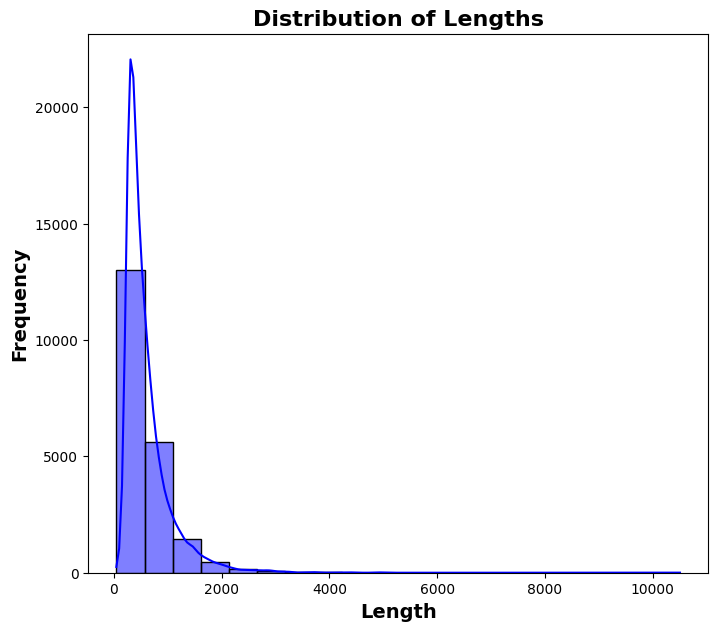

In [ ]:
plt.figure(figsize=(8, 7))

sns.histplot(data=train_data, x='length', bins=20, kde=True, color='blue')

plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')

plt.show()

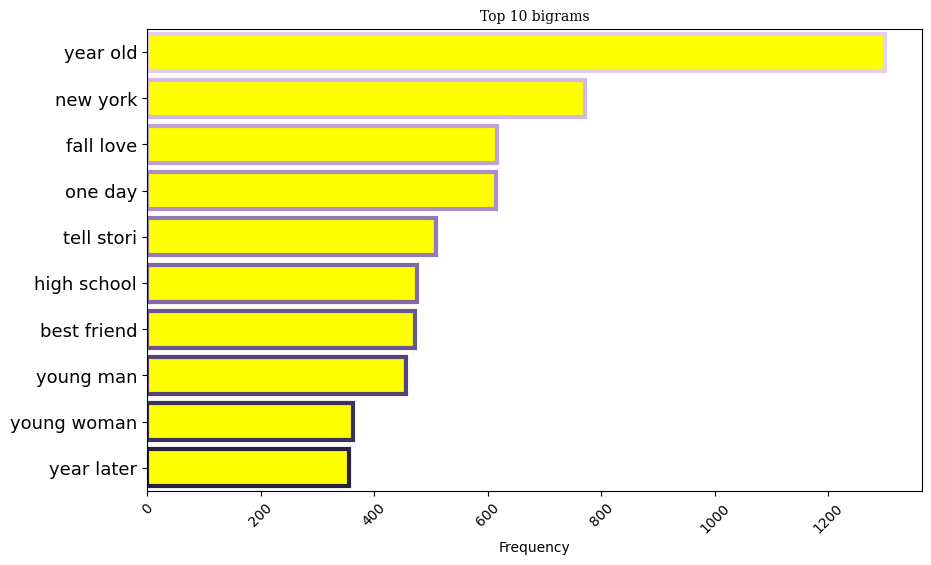

In [ ]:
def get_top_n_bigram(corpus, n=None):
    vec = CV(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(train_data['description_cleaned'], 10)
common_words_df = pd.DataFrame(common_words,columns=['word','freq'])
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='freq', y='word', data=common_words_df,facecolor='yellow',linewidth=3,edgecolor=sns.color_palette("ch:start=3, rot=.1",10))

plt.title("Top 10 bigrams",font='Serif')
plt.xlabel("Frequency", fontsize=10)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=10)
plt.ylabel("");

In [ ]:
le = LabelEncoder()
train_data['genre'] = le.fit_transform(train_data['genre'].values)

# keep only relevent columns
train_df = train_data.loc[:,['description_cleaned', 'genre']]
test_df = test_data.loc[:,['description_cleaned', 'title']]
train_df.head(10)

,description_cleaned,genre
1,listen convers doctor parent year old oscar le...,8
2,brother sister past incestu relationship curre...,24
3,bu empti student field trip museum natur histo...,1
4,help unemploy father make end meet edith twin ...,8
5,film titl refer recov bodi ground zero also st...,8
6,qualiti control consist seri singl take shot f...,7
7,tough econom time max joey run idea discov sen...,5
8,ron petri keanu reev troubl teen whose life ha...,6
9,sudden calamit event caus great loss life dama...,18
10,four high school student embark terrifi journe...,13


In [ ]:
train_set , val_set , train_label , val_label = train_test_split(train_df['description_cleaned'] , train_data['genre'] , test_size=0.2 , shuffle=True , random_state = 42)

print(f'Split data into train and eval sets')
print(f'Trani Set\t: {len(train_set)}\nValidation Set\t: {len(val_set)}')

Split data into train and eval sets
Trani Set	: 16602
Validation Set	: 4151


In [ ]:
# using TF-IDF
vectorize = TfidfVectorizer(stop_words='english', max_features=100000)
train_set_tfidf = vectorize.fit_transform(train_set)
val_set_tfidf = vectorize.transform(val_set)

# **Logistic Regression**

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(train_set_tfidf, train_label)
predict_LR = LR_model.predict(val_set_tfidf)
print(classification_report(val_label, predict_LR))
LR_accuracy = accuracy_score(predict_LR,val_label)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

              precision    recall  f1-score   support

           0       0.48      0.10      0.17        99
           1       1.00      0.08      0.15        49
           2       0.38      0.09      0.14        56
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        25
           5       0.48      0.49      0.49       568
           6       0.00      0.00      0.00        42
           7       0.60      0.85      0.70      1003
           8       0.49      0.79      0.61      1039
           9       0.00      0.00      0.00        61
          10       0.00      0.00      0.00        30
          11       1.00      0.33      0.50        12
          12       0.00      0.00      0.00        13
          13       0.65      0.48      0.55       154
          14       0.85      0.26      0.40        65
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        24
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [ ]:
# Train a Naive Bayes classifier
NB_model = MultinomialNB()
NB_model.fit(train_set_tfidf, train_label)
y_pred_naive = NB_model.predict(val_set_tfidf)
print(classification_report(val_label, y_pred_naive))
naive_accuracy = accuracy_score(y_pred_naive,val_label)
print('Naive Bayes model accuracy is: {:.2f}%'.format(naive_accuracy*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.00      0.00      0.00        49
           2       0.00      0.00      0.00        56
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        25
           5       0.69      0.02      0.04       568
           6       0.00      0.00      0.00        42
           7       0.52      0.88      0.65      1003
           8       0.37      0.86      0.52      1039
           9       0.00      0.00      0.00        61
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00       154
          14       0.00      0.00      0.00        65
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        24
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
DT = DecisionTreeClassifier(max_depth=(1), random_state=0)
DT.fit(train_set_tfidf, train_label)
predict_ID3 = DT.predict(val_set_tfidf)
print(classification_report(val_label, predict_ID3))
ID3_accuracy = accuracy_score(predict_ID3,val_label)
print('ID3 model accuracy is: {:.2f}%'.format(ID3_accuracy*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.00      0.00      0.00        49
           2       0.00      0.00      0.00        56
           3       0.00      0.00      0.00        31
           4       0.00      0.00      0.00        25
           5       0.00      0.00      0.00       568
           6       0.00      0.00      0.00        42
           7       0.83      0.31      0.45      1003
           8       0.27      0.99      0.43      1039
           9       0.00      0.00      0.00        61
          10       0.00      0.00      0.00        30
          11       0.00      0.00      0.00        12
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00       154
          14       0.00      0.00      0.00        65
          15       0.00      0.00      0.00        21
          16       0.00      0.00      0.00        24
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Train a SVC classifier
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(train_set_tfidf, train_label)
predict = svm_model.predict(val_set_tfidf)

print(classification_report(val_label, predict))
svm_accuracy = accuracy_score(predict,val_label)
print('SVC model accuracy is: {:.2f}%'.format(svm_accuracy*100))

              precision    recall  f1-score   support

           0       0.36      0.23      0.28        99
           1       0.57      0.27      0.36        49
           2       0.35      0.20      0.25        56
           3       0.23      0.10      0.14        31
           4       0.00      0.00      0.00        25
           5       0.49      0.50      0.49       568
           6       0.17      0.02      0.04        42
           7       0.65      0.80      0.72      1003
           8       0.52      0.70      0.60      1039
           9       0.30      0.13      0.18        61
          10       0.43      0.10      0.16        30
          11       1.00      0.67      0.80        12
          12       0.00      0.00      0.00        13
          13       0.57      0.57      0.57       154
          14       0.66      0.42      0.51        65
          15       0.50      0.05      0.09        21
          16       0.00      0.00      0.00        24
          17       0.67    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
columns=['LogisticRegression', 'MultinomialNB', 'Decision_Tree','SVC']
accuracy= [LR_accuracy, naive_accuracy, ID3_accuracy, svm_accuracy]

FinalResult=pd.DataFrame({'Algorithm':columns, 'Accuracy':accuracy})

FinalResult

,Algorithm,Accuracy
0,LogisticRegression,0.533847
1,MultinomialNB,0.431462
2,Decision_Tree,0.321850
3,SVC,0.539147


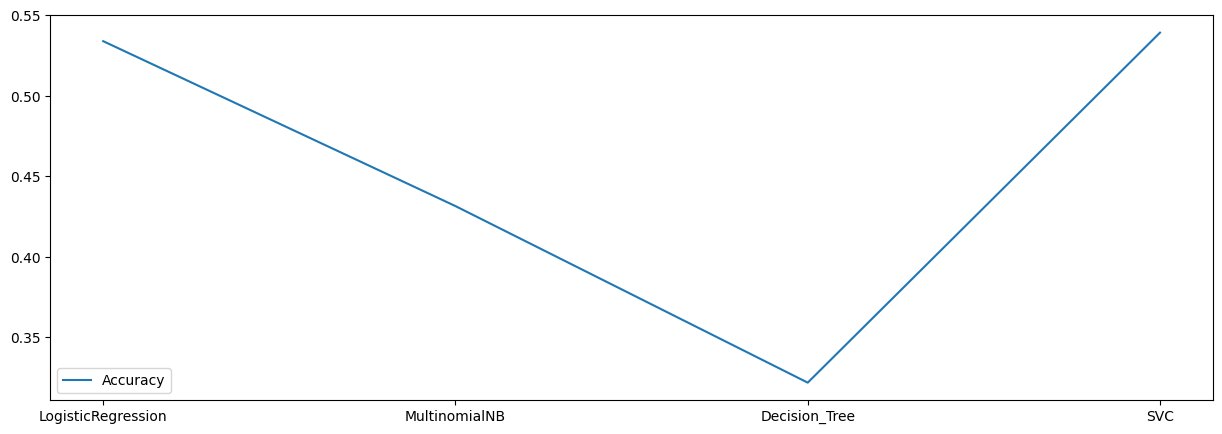

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
plt.plot(FinalResult.Algorithm,accuracy,label="Accuracy")
plt.legend()
plt.show()